# Data Quality Assessment (MOD 1)
## Saloni Jayesh Pandya

In [1]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load Excel File
data=pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')

In [3]:
#Read Excel Sheets
Customer_Demographic = pd.read_excel(data, 'CustomerDemographic', header=1)
Customer_Address = pd.read_excel(data, 'CustomerAddress' ,header=1)
Transactions = pd.read_excel(data, 'Transactions', header=1)

C:\Users\pandy\AppData\Local\Temp/ipykernel_2020/2808852464.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  Customer_Demographic = pd.read_excel(data, 'CustomerDemographic', header=1)
C:\Users\pandy\AppData\Local\Temp/ipykernel_2020/2808852464.py:5: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  New_Customer_List = pd.read_excel(data,'NewCustomerList',header=1)


## For Customer Demographic Dataset

In [50]:
Customer_Demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [5]:
#Number of rows and columns in dataset
Customer_Demographic.shape

(4000, 13)

In [6]:
#Columns and data-types
Customer_Demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [7]:
#Missing values in each column
Customer_Demographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [8]:
#Duplicate values
Customer_Demographic.duplicated().sum()

0

In [47]:
Customer_Demographic['customer_id'].nunique()

4000

In [10]:
Customer_Demographic['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [11]:
Customer_Demographic['DOB'].value_counts()

1978-01-30    7
1964-07-08    4
1962-12-17    4
1978-08-19    4
1977-05-13    4
             ..
1989-06-16    1
1998-09-30    1
1985-03-11    1
1989-10-23    1
1991-11-05    1
Name: DOB, Length: 3448, dtype: int64

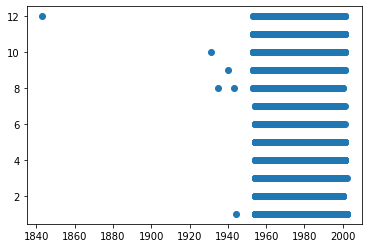

In [12]:
#Scatter plot to check the timeline for DOB
plt.scatter([d.year for d in Customer_Demographic['DOB']], [d.month for d in Customer_Demographic['DOB']])

In [13]:
#Customer more than 100 years in age
Customer_Demographic[Customer_Demographic['DOB'].dt.year < 1923]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0


In [14]:
Customer_Demographic['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [15]:
Customer_Demographic['wealth_segment'].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [16]:
Customer_Demographic['deceased_indicator'].value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

In [17]:
Customer_Demographic['default'].value_counts()

100                                       113
1                                         112
-1                                        111
-100                                       99
Ù¡Ù¢Ù£                                     53
                                         ... 
testâ testâ«                               31
/dev/null; touch /tmp/blns.fail ; echo     30
âªâªtestâª                                 29
ì¸ëë°í ë¥´                                 27
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ           25
Name: default, Length: 90, dtype: int64

In [18]:
Customer_Demographic['owns_car'].value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

In [19]:
Customer_Demographic['tenure'].value_counts()

7.0     235
5.0     228
11.0    221
10.0    218
16.0    215
8.0     211
18.0    208
12.0    202
9.0     200
14.0    200
6.0     192
13.0    191
4.0     191
17.0    182
15.0    179
1.0     166
3.0     160
19.0    159
2.0     150
20.0     96
22.0     55
21.0     54
Name: tenure, dtype: int64

#### Accuracy : In DOB column, there is a year 1843 which could be 1943 as the person would be 180 years old and the deceased_indicator shows N which is not possible.
#### Consistency :  Gender column should only have 3 categories, "Male", "Female" and "U".
#### Validity : Column deceased_indicator should have boolean values like True and False.
#### Completeness : Column last_name(125), DOB(87), job_title(506), job_industry_category(656), default(302) and tenure(87) have missing values.
#### Relevancy : Default column has no relevant information.
#### Uniqueness : All records are unique.

## For Customer Address Dataset

In [20]:
Customer_Address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [21]:
#Number of rows and columns in dataset
Customer_Address.shape

(3999, 6)

In [22]:
#Columns and data-types
Customer_Address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [23]:
#Missing values in each column
Customer_Address.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [24]:
#Duplicate values
Customer_Address.duplicated().sum()

0

In [25]:
Customer_Address['customer_id'].nunique()

3999

In [26]:
Customer_Address['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [27]:
Customer_Address['country'].value_counts()

Australia    3999
Name: country, dtype: int64

In [28]:
Customer_Address['property_valuation'].value_counts()

9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1     154
2     143
Name: property_valuation, dtype: int64

#### Accuracy : Data is accurate.
#### Completeness : No missing values. Data is complete.
#### Relevancy : All records seems relevant
#### Uniqueness : All records are unique.

##  For Transcations Dataset

In [29]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [30]:
#Number of rows and columns in dataset
Transactions.shape

(20000, 13)

In [31]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [32]:
#Missing values in each column
Transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [33]:
#Duplicate values
Transactions.duplicated().sum()

0

In [34]:
Transactions['customer_id'].nunique()

3494

In [35]:
Transactions['online_order'].value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [36]:
Transactions['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [37]:
Transactions['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [38]:
Transactions['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [39]:
Transactions['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [40]:
Transactions['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [41]:
Transactions['product_first_sold_date'].value_counts()

33879.0    234
41064.0    229
37823.0    227
39880.0    222
38216.0    220
          ... 
41848.0    169
42404.0    168
41922.0    166
37659.0    163
34586.0    162
Name: product_first_sold_date, Length: 100, dtype: int64

#### Accuracy : Data is accurate.
#### Validity : Online order should have boolean values like True and False. Also, product_first_sold_date should have datetime format.
#### Completeness : Columns online order(360) while brand, product_line, product_class, product_size, standard_cost and product_first_sold_date have 197 missing values.
#### Uniqueness : All records are unique.

### All 3 datasets have a common column named 'customer_id'.